# Integrate annotated TIL & COLON

## Load adata annotated 

In [1]:
# Libraries
import anndata as ad
import matplotlib as plt
import numpy as np
import pandas as pd
import sc_atlas_helpers as ah
import scanpy as sc
from matplotlib.pyplot import rc_context
from scipy.stats import median_abs_deviation

In [2]:
from functools import partial

import altair as alt

In [3]:
import seaborn as sns

In [4]:
import decoupler as dc

In [5]:
resDir = "/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/results/40_gex_surface_prot/"
inputDir = "/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/results/40_gex_surface_prot/"

In [6]:
adata = sc.read_h5ad(
    "/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/results/adata_merged_til_slec_mpec_annotation_tryneighbors.h5ad"
)

In [7]:
adata.obs.cell_type2

AAACCTGAGAGCCTAG-1_10mix_ICI1          SLEC_Terminal
AAACCTGAGATGTGGC-1_10mix_ICI1               SLEC_Inf
AAACCTGAGGCTCTTA-1_10mix_ICI1        MPEC_Progenitor
AAACCTGAGGGCACTA-1_10mix_ICI1               SLEC_Inf
AAACCTGAGGGCTTGA-1_10mix_ICI1      MPEC_Intermediate
                                         ...        
TTTGTCATCACGCATA-1_GF_ICI2_plus    SLEC_Intermediate
TTTGTCATCCAGAGGA-1_GF_ICI2_plus    SLEC_Intermediate
TTTGTCATCCCTTGCA-1_GF_ICI2_plus        SLEC_Effector
TTTGTCATCTCTGTCG-1_GF_ICI2_plus             SLEC_Inf
TTTGTCATCTGTTGAG-1_GF_ICI2_plus        SLEC_Effector
Name: cell_type2, Length: 40859, dtype: category
Categories (9, object): ['MPEC_Effector', 'MPEC_Intermediate', 'MPEC_Progenitor', 'SLEC_Effector', ..., 'SLEC_Intermediate', 'SLEC_Plastic', 'SLEC_Progenitor', 'SLEC_Terminal']

In [8]:
adata.obs.cell_type

AAACCTGAGAGCCTAG-1_10mix_ICI1          SLEC_Terminal
AAACCTGAGATGTGGC-1_10mix_ICI1               SLEC_Inf
AAACCTGAGGCTCTTA-1_10mix_ICI1        MPEC_Progenitor
AAACCTGAGGGCACTA-1_10mix_ICI1               SLEC_Inf
AAACCTGAGGGCTTGA-1_10mix_ICI1      MPEC_Intermediate
                                         ...        
TTTGTCATCACGCATA-1_GF_ICI2_plus    SLEC_Intermediate
TTTGTCATCCAGAGGA-1_GF_ICI2_plus    SLEC_Intermediate
TTTGTCATCCCTTGCA-1_GF_ICI2_plus        SLEC_Effector
TTTGTCATCTCTGTCG-1_GF_ICI2_plus             SLEC_Inf
TTTGTCATCTGTTGAG-1_GF_ICI2_plus        SLEC_Effector
Name: cell_type, Length: 40859, dtype: category
Categories (9, object): ['MPEC_Effector', 'MPEC_Intermediate', 'MPEC_Progenitor', 'SLEC_Effector', ..., 'SLEC_Intermediate', 'SLEC_Plastic', 'SLEC_Progenitor', 'SLEC_Terminal']

In [9]:
path = "/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/results/solo"

In [10]:
adata_solo = sc.read_h5ad(f"{path}/adata_nodoublet.h5ad")

/home/kvalem/.conda/envs/scanpy/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/kvalem/.conda/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/kvalem/.conda/envs/scanpy/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [11]:
adata.obs

adata_name condition batch_id  \
AAACCTGAGAGCCTAG-1_10mix_ICI1      adata_10mix_ICI1     10mix     ICI1   
AAACCTGAGATGTGGC-1_10mix_ICI1      adata_10mix_ICI1     10mix     ICI1   
AAACCTGAGGCTCTTA-1_10mix_ICI1      adata_10mix_ICI1     10mix     ICI1   
AAACCTGAGGGCACTA-1_10mix_ICI1      adata_10mix_ICI1     10mix     ICI1   
AAACCTGAGGGCTTGA-1_10mix_ICI1      adata_10mix_ICI1     10mix     ICI1   
...                                             ...       ...      ...   
TTTGTCATCACGCATA-1_GF_ICI2_plus  adata_GF_ICI2_plus        GF     ICI2   
TTTGTCATCCAGAGGA-1_GF_ICI2_plus  adata_GF_ICI2_plus        GF     ICI2   
TTTGTCATCCCTTGCA-1_GF_ICI2_plus  adata_GF_ICI2_plus        GF     ICI2   
TTTGTCATCTCTGTCG-1_GF_ICI2_plus  adata_GF_ICI2_plus        GF     ICI2   
TTTGTCATCTGTTGAG-1_GF_ICI2_plus  adata_GF_ICI2_plus        GF     ICI2   

                                    sample_id  n_genes_by_counts  \
AAACCTGAGAGCCTAG-1_10mix_ICI1      10mix_ICI1               2518   
AAACCTGAGATGTGGC-1_10mix_ICI1      10mix_ICI1               3026   
AAACCTGAGGCTCTTA-1_10mix_ICI1      10mix_ICI1               1475   
AAACCTGAGGGCACTA-1_10mix_ICI1      10mix_ICI1               2214   
AAACCTGAGGGCTTGA-1_10mix_ICI1      10mix_ICI1               1926   
...                                       ...                ...   
TTTGTCATCACGCATA-1_GF_ICI2_plus  GF_ICI2_plus               2699   
TTTGTCATCCAGAGGA-1_GF_ICI2_plus  GF_ICI2_plus               2265   
TTTGTCATCCCTTGCA-1_GF_ICI2_plus  GF_ICI2_plus               2113   
TTTGTCATCTCTGTCG-1_GF_ICI2_plus  GF_ICI2_plus               2106   
TTTGTCATCTGTTGAG-1_GF_ICI2_plus  GF_ICI2_plus               2497   

                                 log1p_n_genes_by_counts  total_counts  \
AAACCTGAGAGCCTAG-1_10mix_ICI1                   7.831617   2358.994873   
AAACCTGAGATGTGGC-1_10mix_ICI1                   8.015327   2282.152588   
AAACCTGAGGCTCTTA-1_10mix_ICI1                   7.297091   1878.841064   
AAACCTGAGGGCACTA-1_10mix_ICI1                   7.703008   2029.492310   
AAACCTGAGGGCTTGA-1_10mix_ICI1                   7.563720   1843.223999   
...                                                  ...           ...   
TTTGTCATCACGCATA-1_GF_ICI2_plus                 7.901007   2290.605957   
TTTGTCATCCAGAGGA-1_GF_ICI2_plus                 7.725771   2183.264893   
TTTGTCATCCCTTGCA-1_GF_ICI2_plus                 7.656337   2171.517822   
TTTGTCATCTCTGTCG-1_GF_ICI2_plus                 7.653020   2095.177734   
TTTGTCATCTGTTGAG-1_GF_ICI2_plus                 7.823246   2184.815430   

                                 log1p_total_counts  \
AAACCTGAGAGCCTAG-1_10mix_ICI1              7.766415   
AAACCTGAGATGTGGC-1_10mix_ICI1              7.733313   
AAACCTGAGGCTCTTA-1_10mix_ICI1              7.538942   
AAACCTGAGGGCACTA-1_10mix_ICI1              7.616034   
AAACCTGAGGGCTTGA-1_10mix_ICI1              7.519814   
...                                             ...   
TTTGTCATCACGCATA-1_GF_ICI2_plus            7.737008   
TTTGTCATCCAGAGGA-1_GF_ICI2_plus            7.689034   
TTTGTCATCCCTTGCA-1_GF_ICI2_plus            7.683642   
TTTGTCATCTCTGTCG-1_GF_ICI2_plus            7.647871   
TTTGTCATCTGTTGAG-1_GF_ICI2_plus            7.689744   

                                 pct_counts_in_top_20_genes  \
AAACCTGAGAGCCTAG-1_10mix_ICI1                      3.434011   
AAACCTGAGATGTGGC-1_10mix_ICI1                      3.773906   
AAACCTGAGGCTCTTA-1_10mix_ICI1                      4.629274   
AAACCTGAGGGCACTA-1_10mix_ICI1                      4.200193   
AAACCTGAGGGCTTGA-1_10mix_ICI1                      4.765721   
...                                                     ...   
TTTGTCATCACGCATA-1_GF_ICI2_plus                    3.581061   
TTTGTCATCCAGAGGA-1_GF_ICI2_plus                    3.920442   
TTTGTCATCCCTTGCA-1_GF_ICI2_plus                    3.845407   
TTTGTCATCTCTGTCG-1_GF_ICI2_plus                    4.074997   
TTTGTCATCTGTTGAG-1_GF_ICI2_plus                    3.830758   

                            

### Functions

In [12]:
def update_columns_origin(row):

    if "ICI" not in row["sample_id"]:
        row["origin"] = "colon"
    else:
        row["origin"] = "til"

    return row

In [13]:
def update_columns_batch(row):

    if "ICI1" in row["sample_id"]:
        row["batch_id"] = "ICI1"
    elif "ICI2" in row["sample_id"]:
        row["batch_id"] = "ICI2"
    elif row["sample_id"] == "10mix1":
        row["batch_id"] = "1"
    elif row["sample_id"] == "10mix2":
        row["batch_id"] = "2"

    return row

In [14]:
def update_columns_condition(row):

    if row["sample_id"] == "10mix1":
        row["condition"] = "10mix"
    elif row["sample_id"] == "10mix2":
        row["condition"] = "10mix"
    elif row["sample_id"] == "11mix1":
        row["condition"] = "11mix"
    elif row["sample_id"] == "11mix2":
        row["condition"] = "11mix"
    elif row["sample_id"] == "GF1":
        row["condition"] = "GF"
    elif row["sample_id"] == "GF2":
        row["condition"] = "GF"
    elif row["sample_id"] == "GF-ICI2-plus":
        row["condition"] = "GF-plus"
    elif row["sample_id"] == "GF-ICI1-plus":
        row["condition"] = "GF-plus"
    elif row["sample_id"] == "GF-ICI2":
        row["condition"] = "GF"
    elif row["sample_id"] == "GF-ICI1":
        row["condition"] = "GF"
    elif row["sample_id"] == "10mix-ICI1":
        row["condition"] = "10mix"
    elif row["sample_id"] == "10mix-ICI2":
        row["condition"] = "10mix"
    elif row["sample_id"] == "11mix-ICI1":
        row["condition"] = "11mix"
    elif row["sample_id"] == "11mix-ICI2":
        row["condition"] = "11mix"

    return row

In [15]:
def is_outlier(adata, metric: str, nmads: int):
    M = adata.obs[metric]
    outlier = (M < np.median(M) - nmads * median_abs_deviation(M)) | (
        np.median(M) + nmads * median_abs_deviation(M) < M
    )
    return outlier

### Map adata cell type column to adata_solo based on cell barcodes 

In [16]:
adata_solo.obs["sample_id"] = adata_solo.obs["sample_id"].str.replace("-", "_")

In [17]:
new_obs_names = adata_solo.obs_names.str.replace(r"-.+", "-1", regex=True)

# Step 2: Concatenate with "_" and adata_solo.obs["sample_id"]
new_obs_names += "_" + adata_solo.obs["sample_id"].astype(str)

# Assign the new values back to adata_solo.obs_names
adata_solo.obs_names = new_obs_names

In [18]:
cell_type_data = adata.obs["cell_type"]
adata_solo.obs["cell_type"] = adata_solo.obs.index.map(cell_type_data)

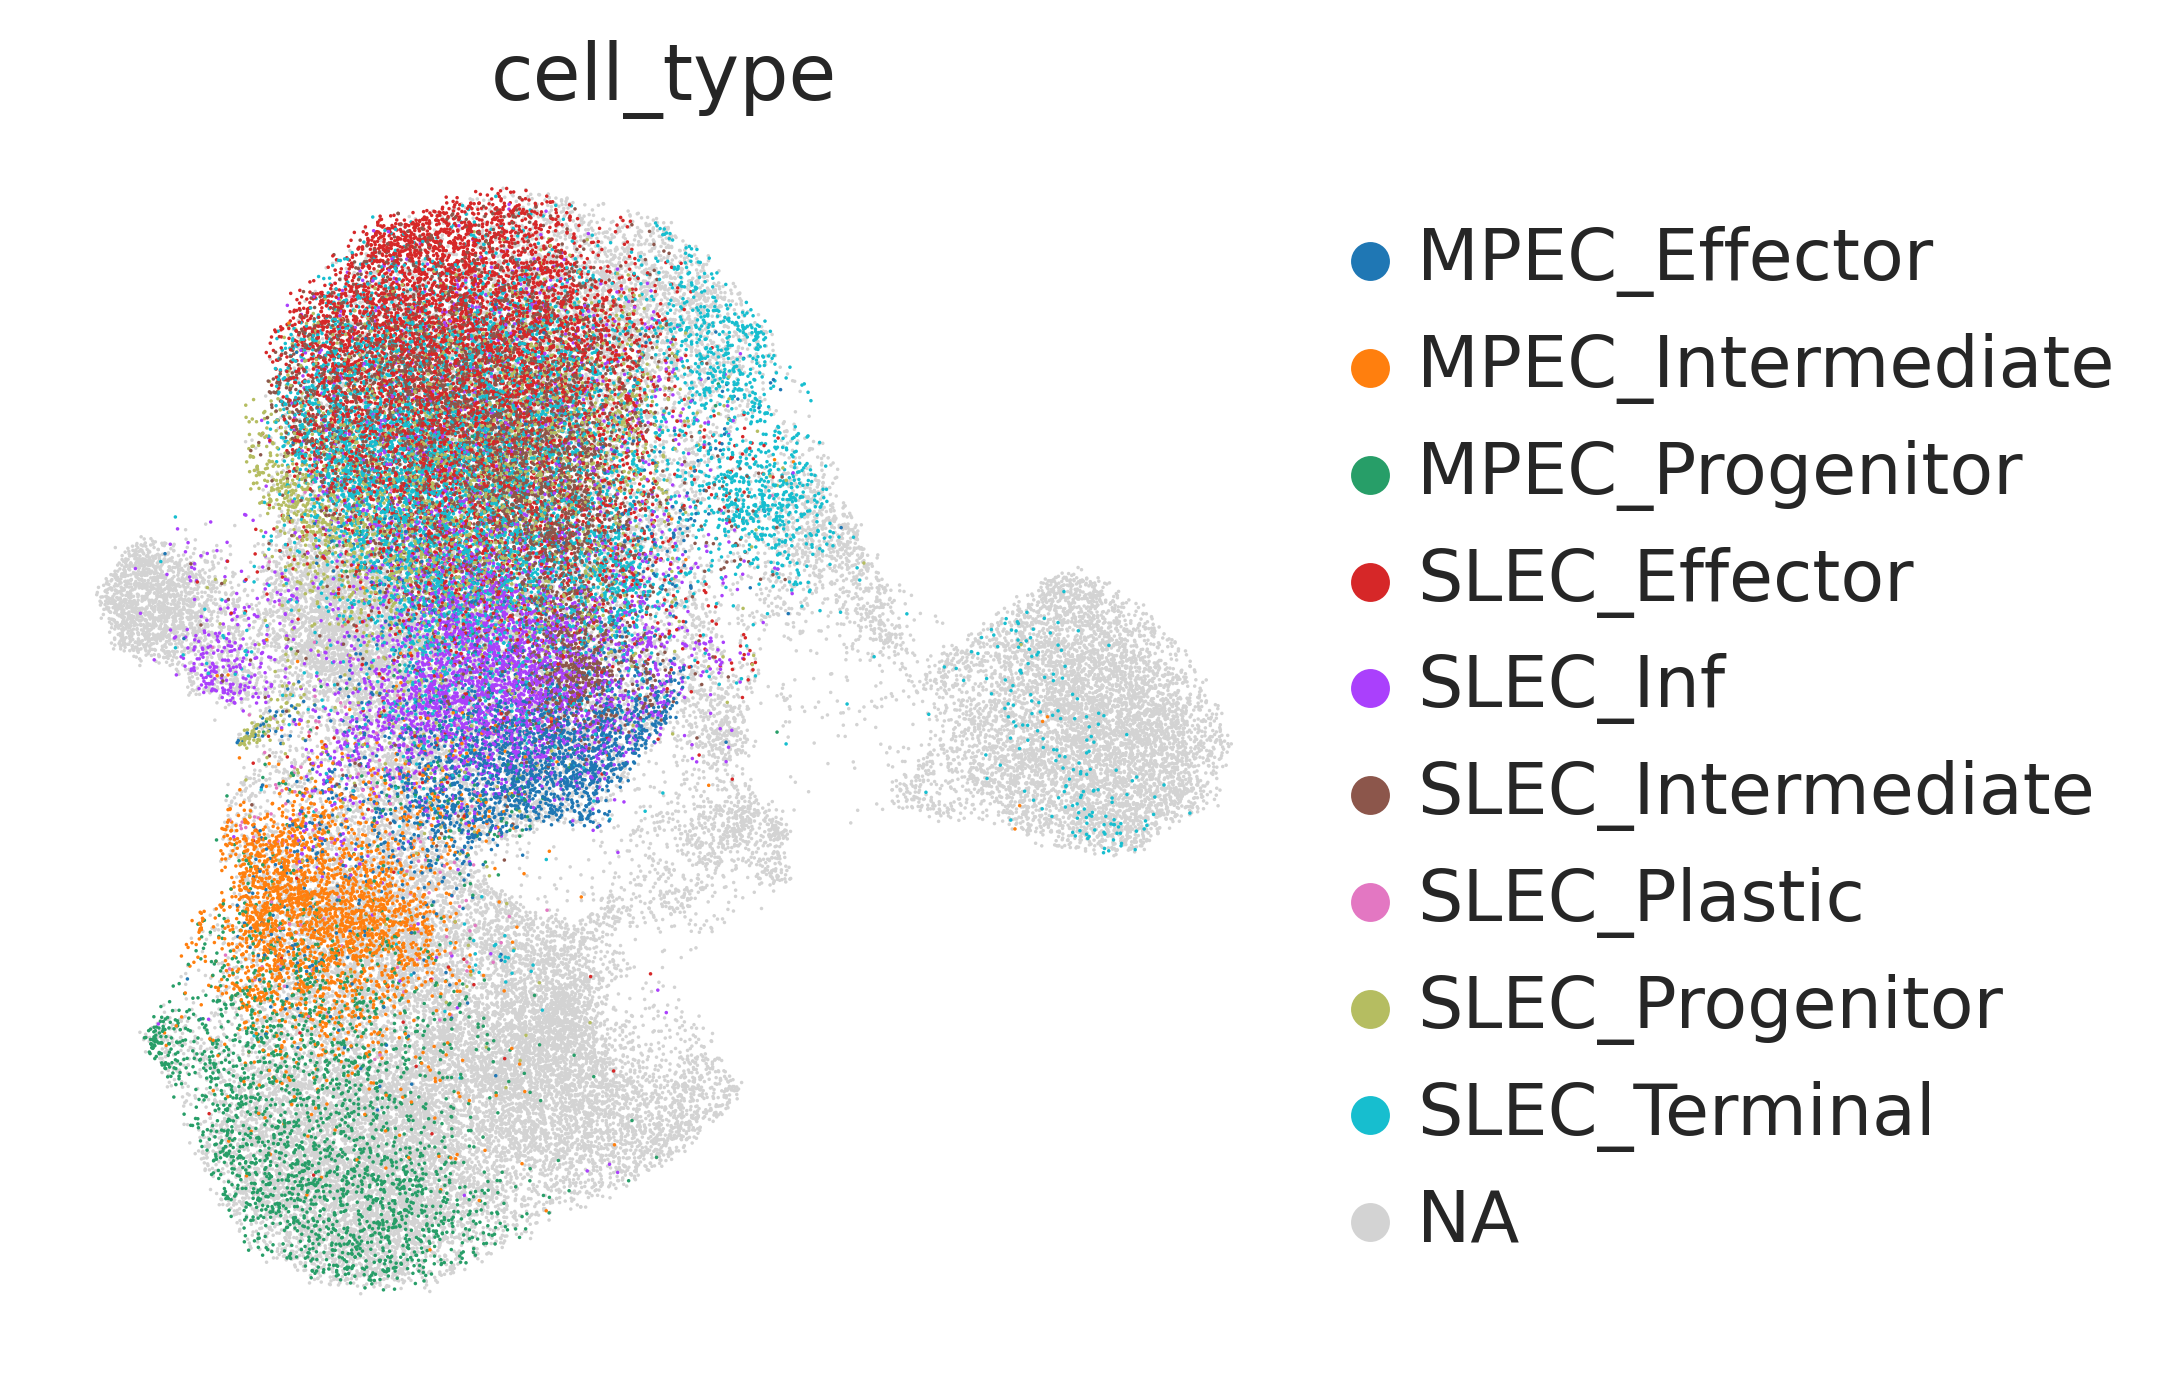

In [19]:
sc.pl.umap(adata_solo, color=["cell_type"], vmax="p99", cmap="Reds")

In [20]:
# Apply the function to each row in the DataFrame
adata_solo.obs = adata_solo.obs.apply(update_columns_origin, axis=1)

In [21]:
# Apply the function to each row in the DataFrame
adata_solo.obs = adata_solo.obs.apply(update_columns_batch, axis=1)

In [22]:
# Apply the function to each row in the DataFrame
adata_solo.obs = adata_solo.obs.apply(update_columns_condition, axis=1)

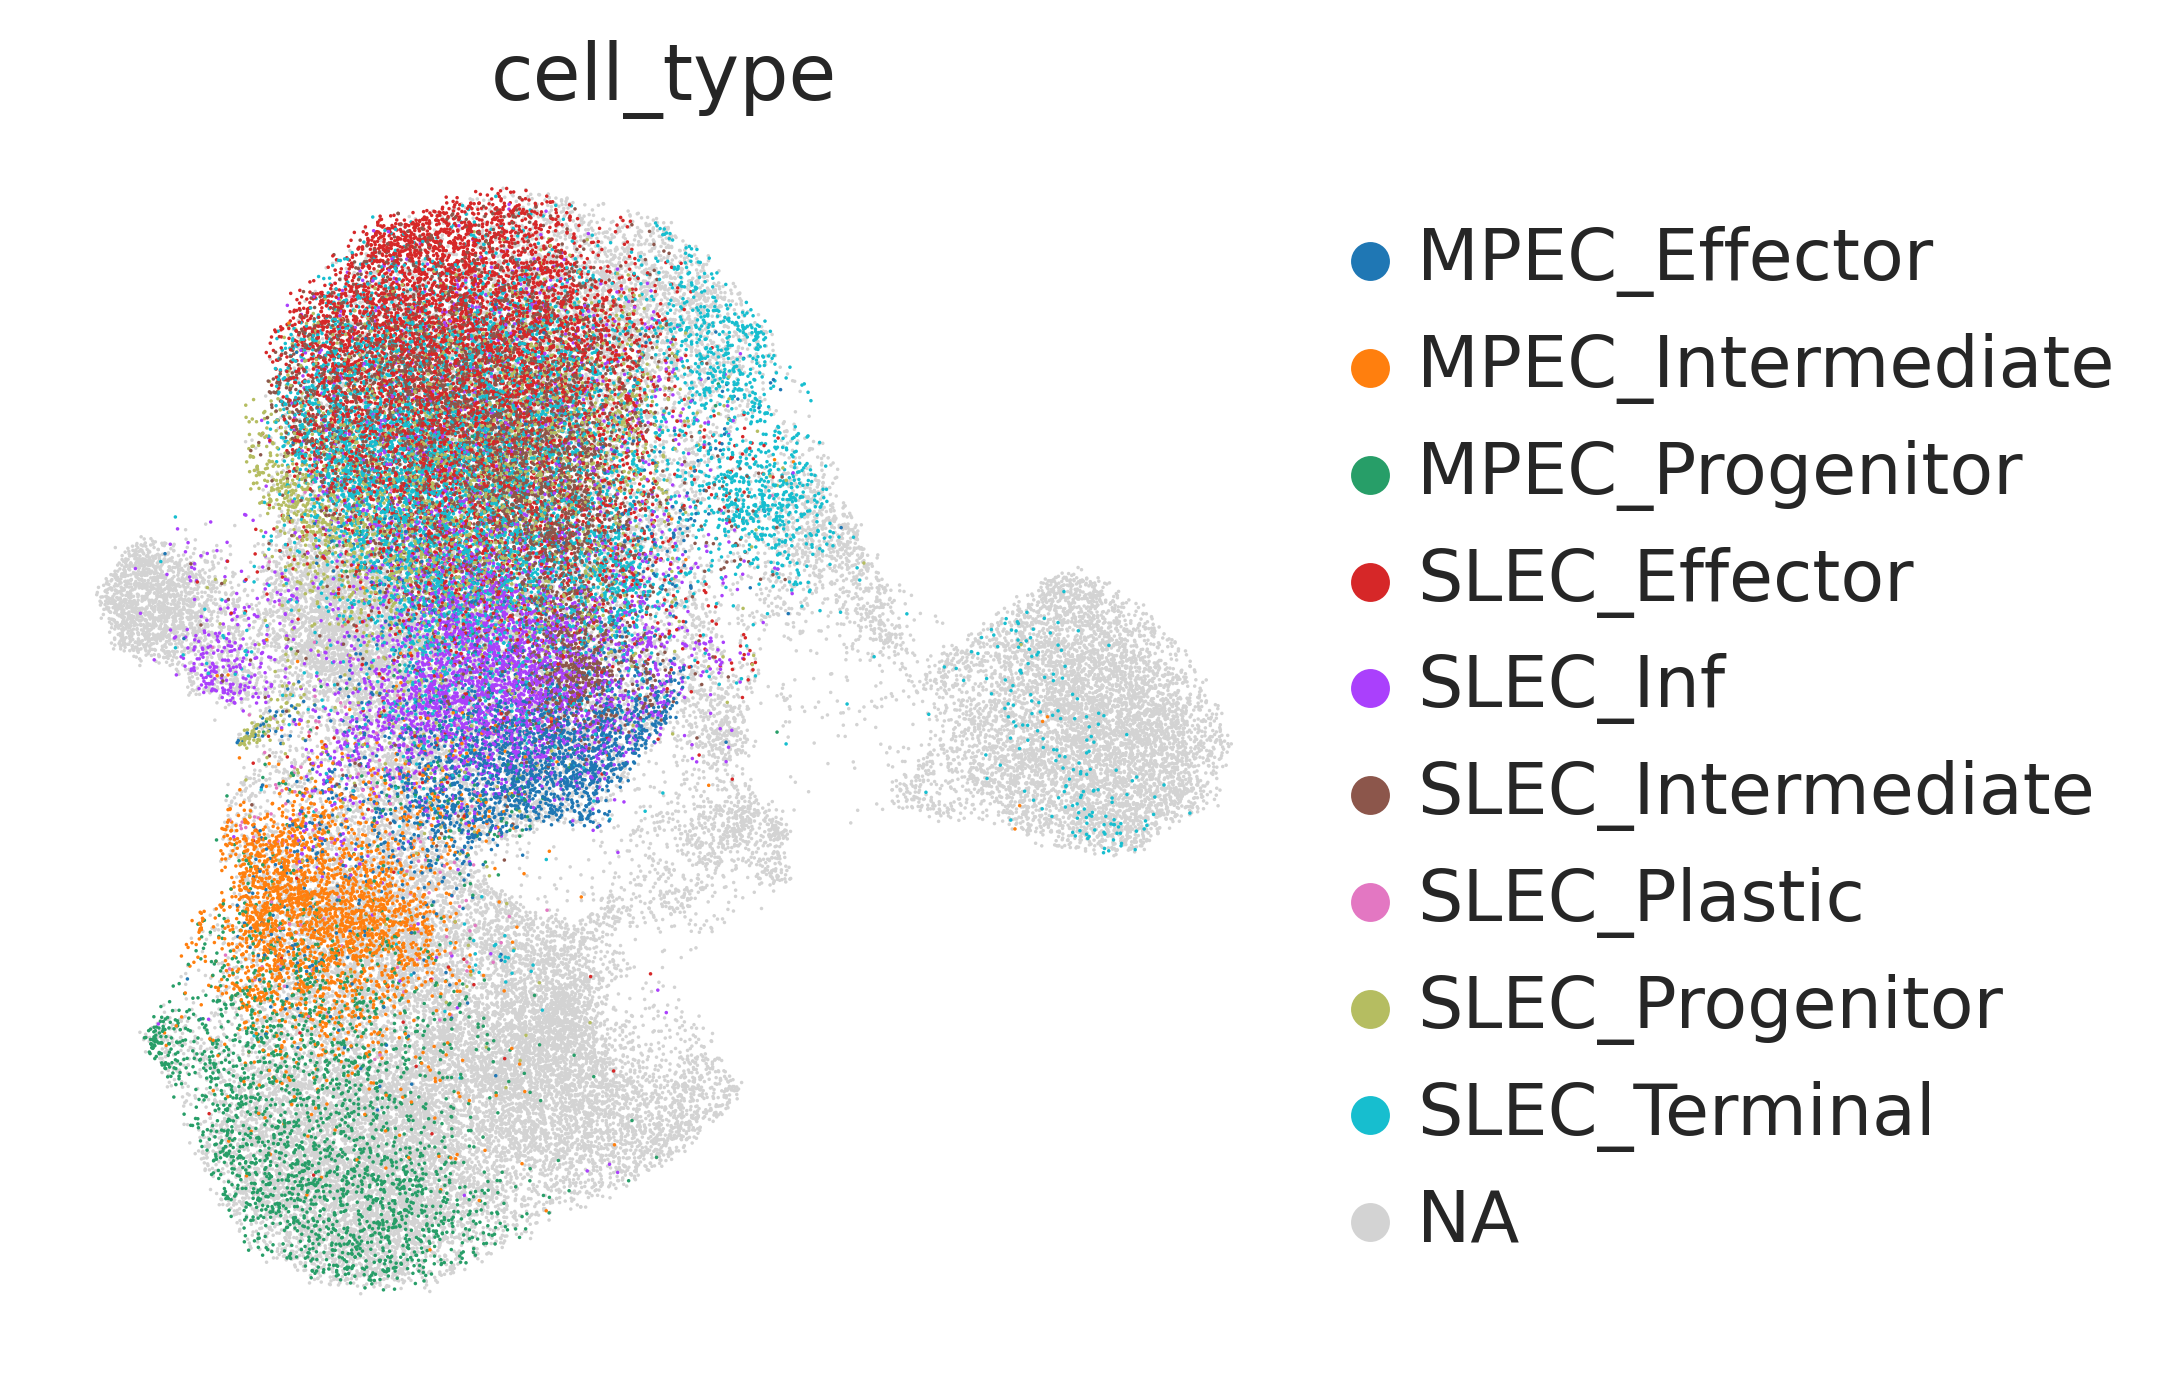

In [23]:
sc.pl.umap(adata_solo, color=["cell_type"])

## QC 

In [24]:
# mitochondrial genes
adata_solo.var["mt"] = adata_solo.var_names.str.startswith("mt-")
# ribosomal genes
adata_solo.var["ribo"] = adata_solo.var_names.str.startswith(("Rps", "Rpl"))

In [25]:
sc.pp.calculate_qc_metrics(
    adata_solo, qc_vars=["mt", "ribo"], inplace=True, percent_top=[20], log1p=True
)
adata_solo

AnnData object with n_obs × n_vars = 74491 × 12052
    obs: '_scvi_batch', '_scvi_labels', 'batch', 'batch_id', 'cell_type', 'condition', 'is_doublet', 'is_outlier', 'is_outlier_counts', 'is_outlier_genes', 'is_outlier_mito', 'is_outlier_top_20', 'leiden', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'log1p_total_counts_ribo', 'n_counts', 'n_genes', 'n_genes_by_counts', 'origin', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'sample_id', 'total_counts', 'total_counts_mt', 'total_counts_ribo', 'value'
    var: 'ensembl_id', 'feature_types', 'gene_name', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'hvg', 'is_doublet_colors', 'leiden', 'log1p', 'neighbors', 'neighbors_uncorrected', 'sample_id_colors', 'umap', 'ce

In [26]:
adata_solo.var_names_make_unique()

In [27]:
adata_solo.var

ensembl_id    feature_types       gene_name     mt  \
gene_name                                                                    
Mrpl15          ENSMUSG00000033845  Gene Expression          Mrpl15  False   
Lypla1          ENSMUSG00000025903  Gene Expression          Lypla1  False   
Tcea1           ENSMUSG00000033813  Gene Expression           Tcea1  False   
Atp6v1h         ENSMUSG00000033793  Gene Expression         Atp6v1h  False   
Rb1cc1          ENSMUSG00000025907  Gene Expression          Rb1cc1  False   
...                            ...              ...             ...    ...   
CAAA01118383.1  ENSMUSG00000063897  Gene Expression  CAAA01118383.1  False   
Vamp7           ENSMUSG00000051412  Gene Expression           Vamp7  False   
Tmlhe           ENSMUSG00000079834  Gene Expression           Tmlhe  False   
CAAA01147332.1  ENSMUSG00000095742  Gene Expression  CAAA01147332.1  False   
AC149090.1      ENSMUSG00000095041  Gene Expression      AC149090.1  False   

                 ribo  n_cells_by_counts  mean_counts  log1p_mean_counts  \
gene_name                                                                  
Mrpl15          False              15644     1.169332           0.774419   
Lypla1          False              14215     1.073952           0.729456   
Tcea1           False              30545     2.373390           1.215918   
Atp6v1h         False              10560     0.817953           0.597711   
Rb1cc1          False              15940     1.282039           0.825069   
...               ...                ...          ...                ...   
CAAA01118383.1  False               7156     0.550870           0.438816   
Vamp7           False               4551     0.335245           0.289115   
Tmlhe           False                488     0.038844           0.038109   
CAAA01147332.1  False              14892     1.133343           0.757690   
AC149090.1      False              22119     1.784409           1.024036   

                pct_dropout_by_counts   total_counts  log1p_total_counts  \
gene_name                                                                  
Mrpl15                      78.998805   87104.710938           11.374878   
Lypla1                      80.917158   79999.789062           11.289792   
Tcea1                       58.995046  176796.218750           12.082759   
Atp6v1h                     85.823791   60930.109375           11.017499   
Rb1cc1                      78.601442   95500.367188           11.466896   
...                               ...            ...                 ...   
CAAA01118383.1              90.393470   41034.832031           10.622201   
Vamp7                       93.890537   24972.708984           10.125579   
Tmlhe                       99.344887    2893.559814            7.970588   
CAAA01147332.1              80.008323   84423.882812           11.343617   
AC149090.1                  70.306480  132922.437500           11.797528   

                n_cells  n_counts  highly_variable  highly_variable_rank  \
gene_name                                                                  
Mrpl15            21484   24002.0            False                   NaN   
Lypla1            19725   20230.0            False                   NaN   
Tcea1             40436   45545.0            False                   NaN   
Atp6v1h           14481   14530.0            False                3409.5   
Rb1cc1            21130   21450.0            False                2045.0   
...                 ...       ...              ...                   ...   
CAAA01118383.1     9764    9803.0            False                2894.0   
Vamp7              6640    6672.0            False                2992.0   
Tmlhe               592     598.0             True                 978.0   
CAAA01147332.1    20802   27325.0            False                2826.0   
AC149090.1        29748   32886.0            False                2257.0   

                   means  variances  varia

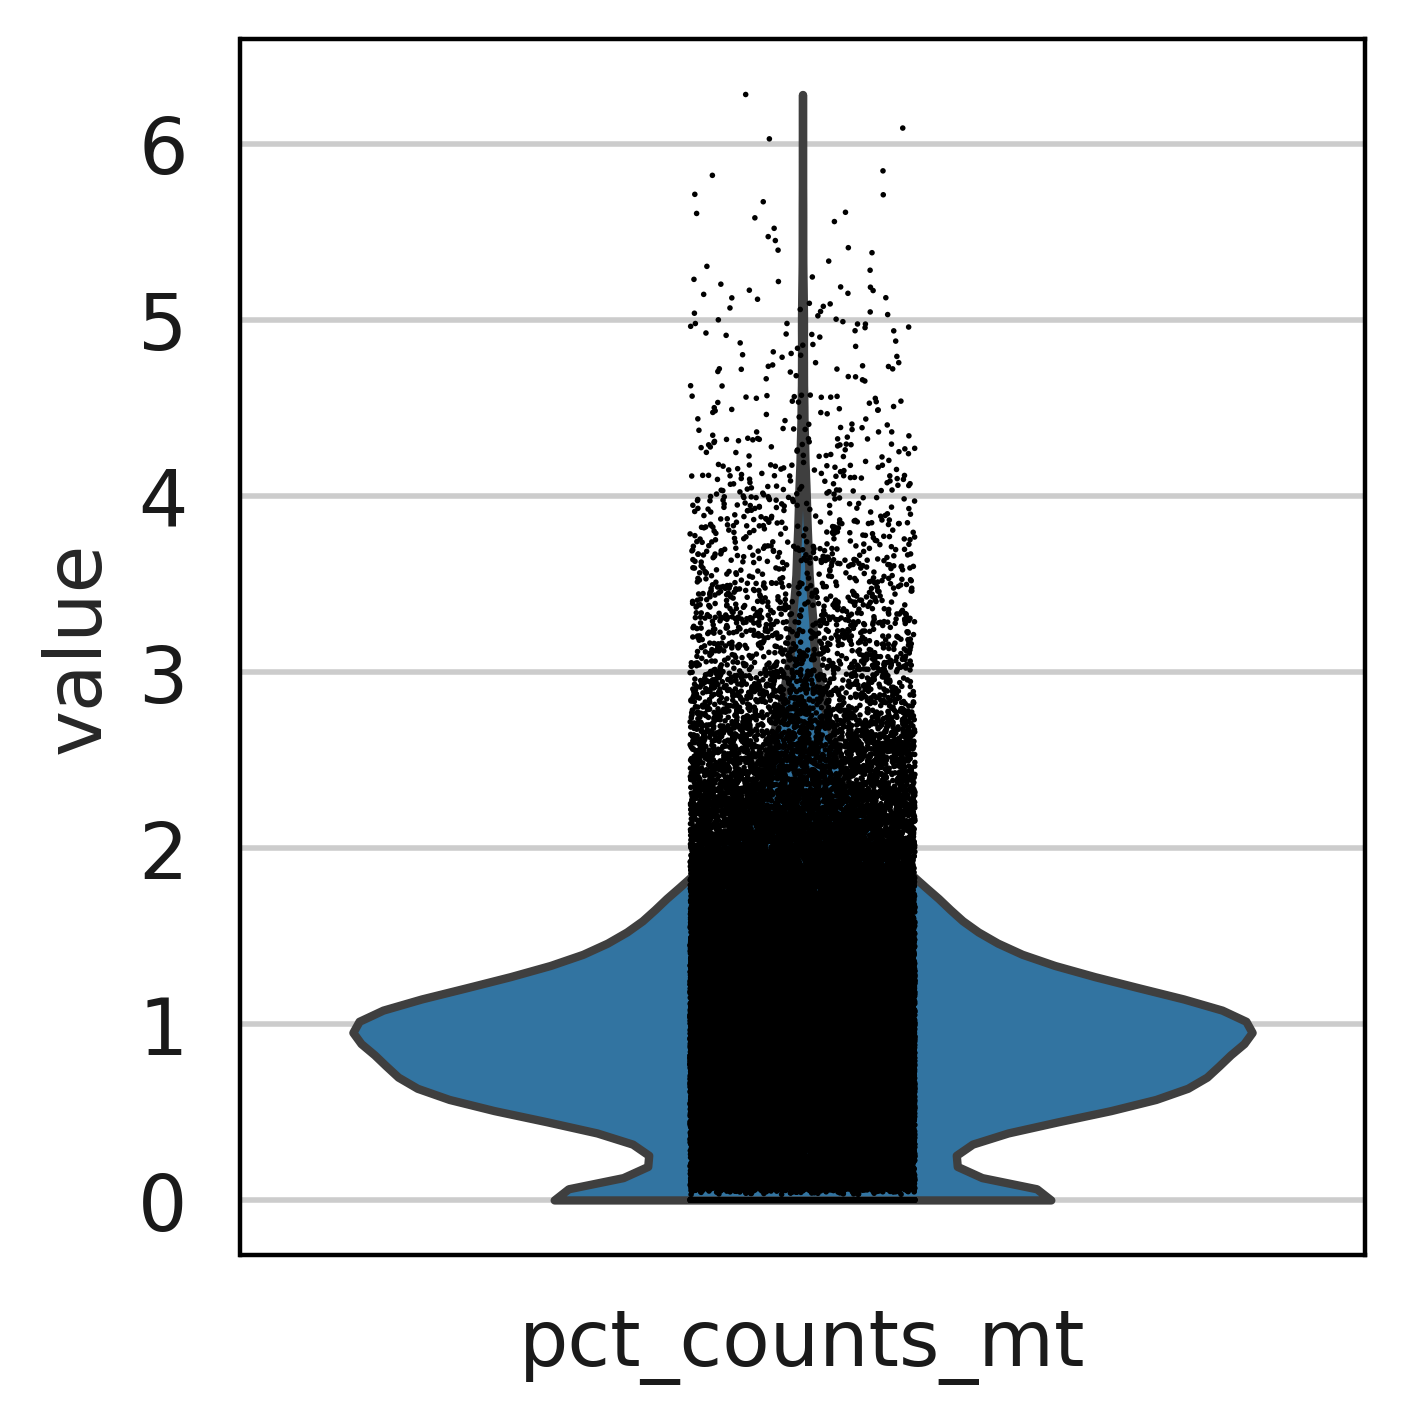

In [28]:
sc.pl.violin(adata_solo, "pct_counts_mt", use_raw=False)

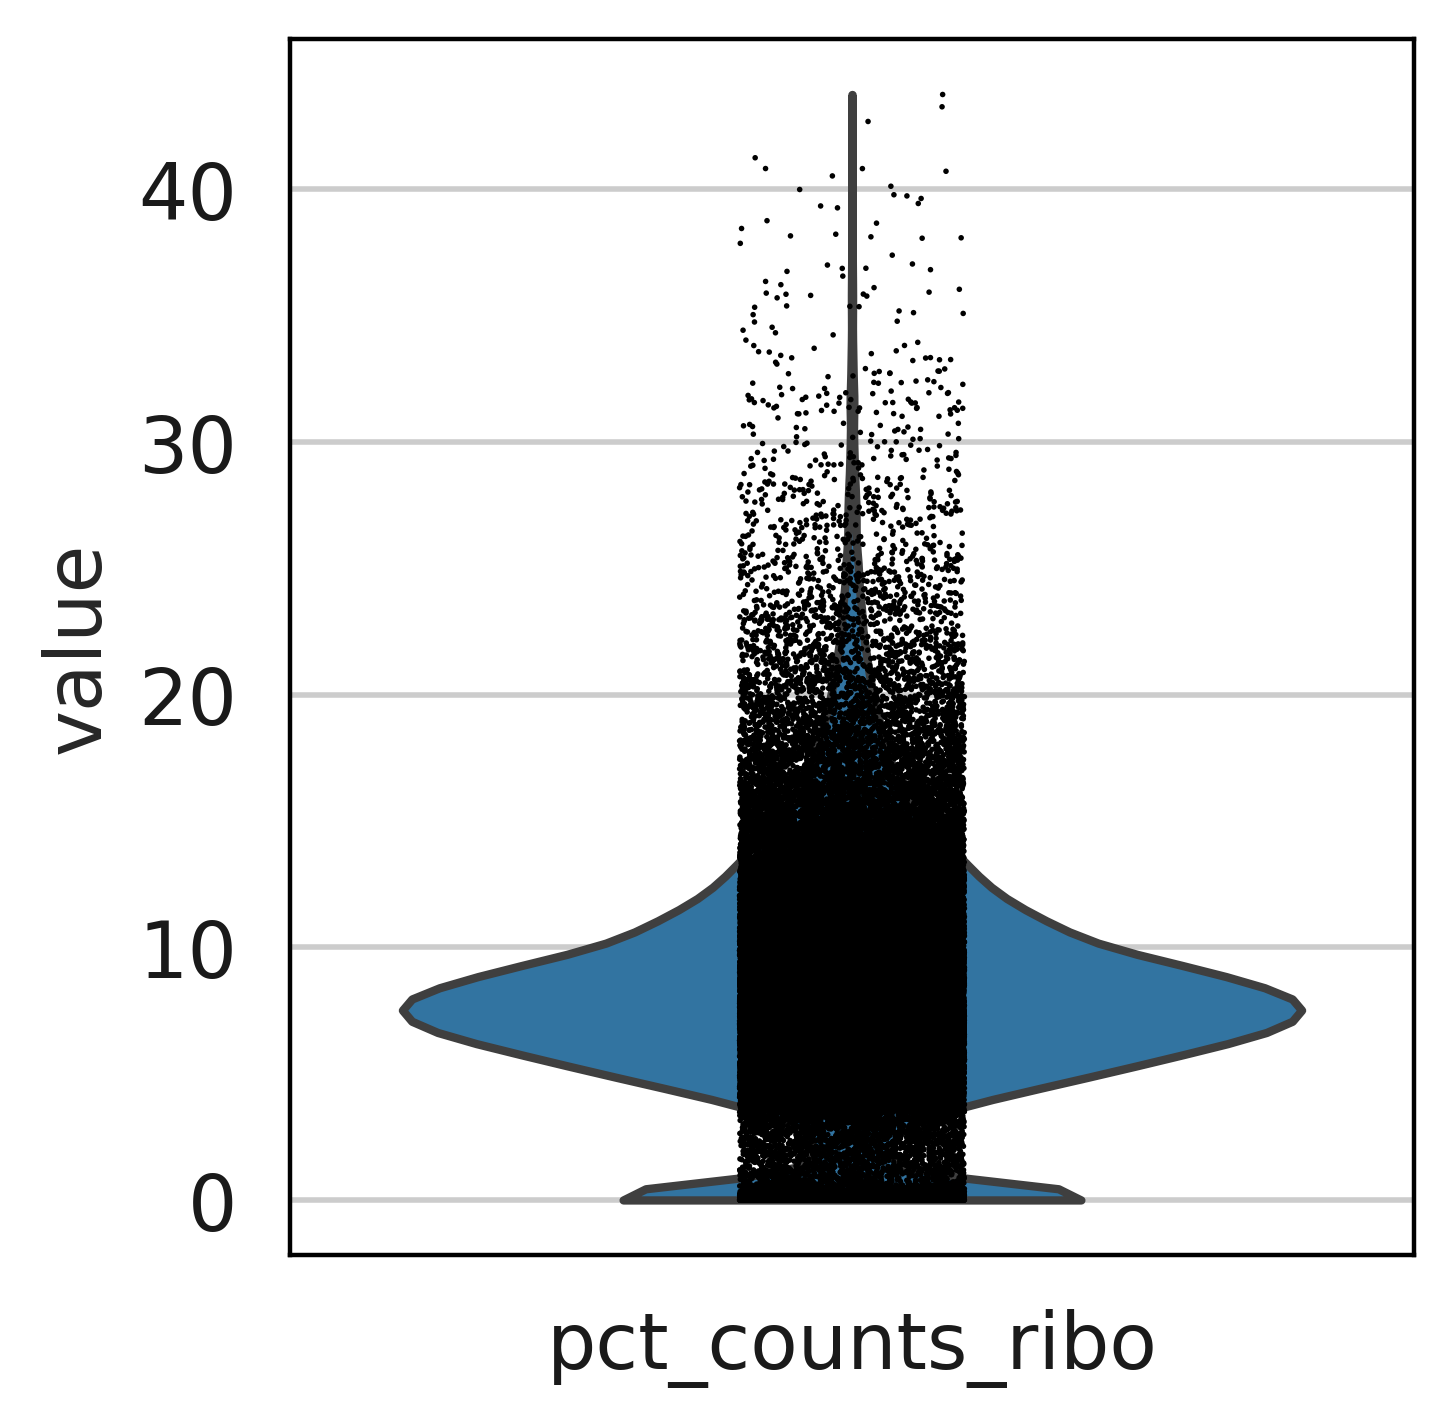

In [29]:
sc.pl.violin(adata_solo, "pct_counts_ribo", use_raw=False)

In [30]:
adata_solo.obs["outlier"] = (
    is_outlier(adata_solo, "log1p_total_counts", 5)
    | is_outlier(adata_solo, "log1p_n_genes_by_counts", 5)
    | is_outlier(adata_solo, "pct_counts_in_top_20_genes", 5)
)
adata_solo.obs.outlier.value_counts()

False    71783
True      2708
Name: outlier, dtype: int64

In [31]:
adata_solo.obs["mt_outlier"] = is_outlier(adata_solo, "pct_counts_mt", 3) | (
    adata_solo.obs["pct_counts_mt"] > 10
)
adata_solo.obs.mt_outlier.value_counts()

False    68642
True      5849
Name: mt_outlier, dtype: int64

In [32]:
adata_solo.obs["ribo_outlier"] = is_outlier(adata_solo, "pct_counts_ribo", 3) | (
    adata_solo.obs["pct_counts_ribo"] > 15
)
adata_solo.obs.mt_outlier.value_counts()

False    68642
True      5849
Name: mt_outlier, dtype: int64

In [ ]:
print(f"Total number of cells: {adata_solo.n_obs}")
adata_solo = adata_solo[(~adata_solo.obs.outlier) & (~adata_solo.obs.mt_outlier)].copy()

print(f"Number of cells after filtering of low quality cells: {adata_solo.n_obs}")

Total number of cells: 74491


In [ ]:
print(f"Total number of cells: {adata_solo.n_obs}")
adata_solo = adata_solo[
    (~adata_solo.obs.outlier) & (~adata_solo.obs.ribo_outlier)
].copy()

print(f"Number of cells after filtering of low quality cells: {adata_solo.n_obs}")

In [ ]:
#sc.pl.violin(adata_solo, "pct_counts_mt", use_raw=False)

In [ ]:
#sc.pl.violin(adata_solo, "pct_counts_ribo", use_raw=False)

In [ ]:
adata_solo.var["ribo"] = adata_solo.var_names.str.startswith(("Rps", "Rpl"))

In [ ]:
# adata_solo.var.ribo.value_counts()

In [ ]:
adata_solo = adata_solo[:, adata_solo.var["ribo"] == False].copy()

In [ ]:
adata_solo.var["mt"] = adata_solo.var_names.str.startswith(("mt-", "mt-"))

In [ ]:
# adata_solo.var.mt.value_counts()

In [ ]:
adata_solo = adata_solo[:, adata_solo.var["mt"] == False].copy()

In [ ]:
# Visualize
# adata_solo
#sc.pl.umap(
#    adata_solo,
#    color=["pct_counts_mt", "total_counts", "n_genes_by_counts"],
#    vmax="p99",
#    cmap="inferno",
#)

In [ ]:
sc.tl.rank_genes_groups(adata_solo, "leiden", method="wilcoxon")

In [ ]:
#pd.DataFrame(adata_solo.uns["rank_genes_groups"]["names"]).head(20)

In [ ]:
#sc.pl.highest_expr_genes(adata_solo, n_top=40, gene_symbols="gene_name")

### Split adata

In [ ]:
adata_solo.var.index = adata_solo.var["ensembl_id"]

In [ ]:
adata_solo_til = adata_solo[adata_solo.obs["origin"] == "til"]

In [ ]:
sc.tl.rank_genes_groups(adata_solo_til, "cell_type", method="wilcoxon")

In [ ]:
#pd.DataFrame(adata_solo_til.uns["rank_genes_groups"]["names"]).head(20)

In [ ]:
#sc.pl.highest_expr_genes(adata_solo_til, n_top=20, gene_symbols="gene_name")

In [ ]:
adata_solo_colon = adata_solo[adata_solo.obs["origin"] == "colon"]

### Annotate colon

In [ ]:
sc.pl.umap(adata_solo_colon, color=["condition", "sample_id", "leiden"])

In [ ]:
sc.tl.rank_genes_groups(adata_solo_colon, "leiden", method="wilcoxon")

In [ ]:
#pd.DataFrame(adata_solo_colon.uns["rank_genes_groups"]["names"]).head(20)

In [ ]:
adata_solo_colon.var["ribo"] = adata_solo_colon.var_names.str.startswith(("Rps", "Rpl"))

In [ ]:
adata_solo_colon = adata_solo_colon[:, adata_solo_colon.var["ribo"] == False].copy()

In [ ]:
sc.pp.neighbors(adata_solo_colon, n_neighbors=10)
sc.tl.leiden(adata_solo_colon, resolution=0.5, n_iterations=-1)

In [ ]:
#sc.pl.umap(adata_solo_colon, color=["leiden"], vmax="p99", cmap="Reds")

In [ ]:
markers = {
    "Naive": ["Lef1", "Sell", "Ccr7", "Tcf7","Il7r"],
    "Effector M.": ["Gzmk", "Cxcr4", "Cxcr3", "Cd44"], # Predysfunctional
    "Exhausted": ["Havcr2", "Pdcd1", "Ifng", "Itgae","Lag3","Ctla4"], # Dysfunctional
    "Cytotoxic": ["Cx3cr1", "Klrg1", "Prf1"],
}

In [ ]:
sc.pl.dotplot(
    adata_solo_colon,
    groupby="leiden",
    use_raw=False,
    var_names=markers,
    dendrogram=False,
    log=True,
    gene_symbols="gene_name",
)


In [ ]:
sc.pl.umap(
    adata_solo_colon,
    color=[
        "Lef1",
        "Sell",
        "Ccr7",
        "Tcf7",
        "Gzmk",
        "Cxcr4",
        "Cxcr3",
        "Cd44",
        "Havcr2",
        "Pdcd1",
        "Ifng",
        "Itgae",
        "Cx3cr1",
        "Klrg1",
        "Prf1",
        "Mki67",
        "Ccl5",
        "H2-K1",
        "H2-Q4",
        "H2-Q7",
    ],
    vmax="p99",
    cmap="Reds",
    add_outline=True,
)

In [ ]:
sc.pl.umap(
    adata_solo_colon, color=["leiden"], vmax="p99", cmap="Reds", legend_loc="on data"
)

In [ ]:
annotation_dict = {
    "0": "COLON_Exhausted",
    "1": "COLON_Exhausted",
    "2": "COLON_Naive",
    "3": "COLON_Naive",
    "4": "COLON_Naive",
    "5": "COLON_Exhausted",
    "6": "COLON_Intermediate",
    "7": "COLON_Exhausted",
    "8": "COLON_Naive",
    "9": "COLON_Exhausted",
}



In [ ]:
## Add cell type column based on annotation
adata_solo_colon.obs["cell_type"] = [
    annotation_dict[clust] for clust in adata_solo_colon.obs["leiden"]
]
# Visualize
sc.pl.umap(
    adata_solo_colon,
    color=["cell_type", "leiden"],

    legend_fontsize=8,
)

In [ ]:
#sc.tl.rank_genes_groups(adata_solo_colon, "cell_type", method="wilcoxon")

In [ ]:
#pd.DataFrame(adata_solo_colon.uns["rank_genes_groups"]["names"]).head(20)

## Exhausted subtypes

In [ ]:
adata_solo_colon_ex = adata_solo_colon[
    adata_solo_colon.obs["cell_type"] == "COLON_Exhausted"
]

In [ ]:
sc.pp.neighbors(adata_solo_colon_ex, n_neighbors=10)
sc.tl.leiden(adata_solo_colon_ex, resolution=0.3, n_iterations=-1)

In [ ]:
sc.pl.umap(
    adata_solo_colon_ex,
    color=["Il7r","Ccr7","Ifng","Tbx21","Lag3","Cxcr6","Gzmb","Gzmk"],
    vmax="p99",
    cmap="Reds",
    add_outline=True,
)

In [ ]:
sc.pl.umap(adata_solo_colon_ex, color=["leiden"], vmax="p99")

In [ ]:
#sc.tl.rank_genes_groups(adata_solo_colon_ex, "leiden", method="wilcoxon")

In [ ]:
#pd.DataFrame(adata_solo_colon_ex.uns["rank_genes_groups"]["names"]).head(20)

In [ ]:
annotation_dict = {
    "0": "COLON_Ex2",
    "1": "COLON_Ex1",  # Ifng
    "2": "COLON_Ex2",
    "3": "COLON_Ex2",
    "4": "COLON_Ex2",

}


In [ ]:
## Add cell type column based on annotation
adata_solo_colon_ex.obs["cell_type"] = [
    annotation_dict[clust] for clust in adata_solo_colon_ex.obs["leiden"]
]
# Visualize
sc.pl.umap(
    adata_solo_colon_ex,
    color=["cell_type", "leiden"],

    legend_fontsize=8,
)

### Reintegrate annotated subsets

In [ ]:
#adata_solo_colon.obs["cell_type"] = adata_solo_colon_ex.obs["cell_type"].astype("str")#
adata_solo_colon.obs.loc[adata_solo_colon_ex.obs.index, "cell_type"] = adata_solo_colon_ex.obs["cell_type"].astype("str")

In [ ]:
#adata_solo_colon_rest = adata_solo_colon[
#    adata_solo_colon.obs["cell_type"].isin(["COLON_Naive","COLON_Intermediate"])
#]

In [ ]:
#adata_solo_colon.obs["cell_type"] = adata_solo_colon_rest.obs["cell_type"].astype("str")
#adata_solo_colon.obs.loc[adata_solo_colon_rest.obs.index, "cell_type"] = adata_solo_colon_rest.obs["cell_type"].astype("str")